In [1]:
import tensorflow as tf 
from tensorflow import keras

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
tf.test.is_built_with_cuda()

True

In [4]:
print(tf.version.VERSION)

2.1.0


In [5]:
import sys
sys.version

'3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]'

In [11]:
import librosa
import librosa.display
import numpy as np

ModuleNotFoundError: No module named 'librosa'

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
TESS = "C:/Users/Moritz/Desktop/Data/TESS/"
RAV = "C:/Users/Moritz/Desktop/Data/RAVDESS/"
SAVEE = "C:/Users/Moritz/Desktop/Data/SAVEE/"
CREMA = "C:/Users/Moritz/Desktop/Data/CREMAD/AudioWAV/"

In [4]:
#Check out SAVEE

In [5]:
#Example

dir_list = os.listdir(SAVEE)
dir_list[0:5]

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']

In [6]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

In [7]:
# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)

In [8]:
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: labels, dtype: int64

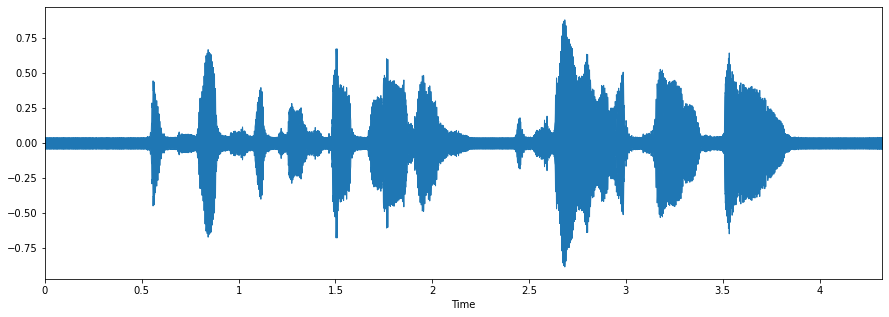

In [9]:
# use the Librosa library for exploring
fname = SAVEE + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [10]:
# Lets play the audio 
ipd.Audio(fname)

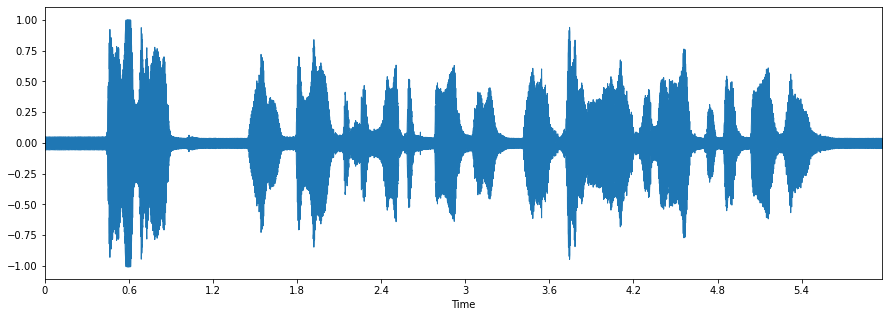

In [11]:
# Lets play a happy track
fname = SAVEE + 'DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [12]:
# Lets play the audio 
ipd.Audio(fname)

In [13]:
#Check out RAVDESS

In [14]:
dir_list = os.listdir(RAV)
dir_list.sort()

In [15]:
emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

In [16]:
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] = RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_sad            96
male_surprise       96
female_sad          96
male_disgust        96
male_angry          96
male_fear           96
male_happy          96
female_angry        96
female_surprise     96
female_disgust      96
female_fear         96
female_happy        96
Name: labels, dtype: int64

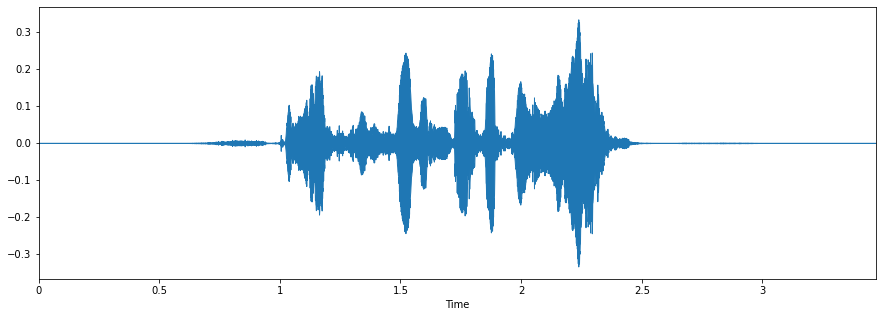

In [17]:
#Explore data
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

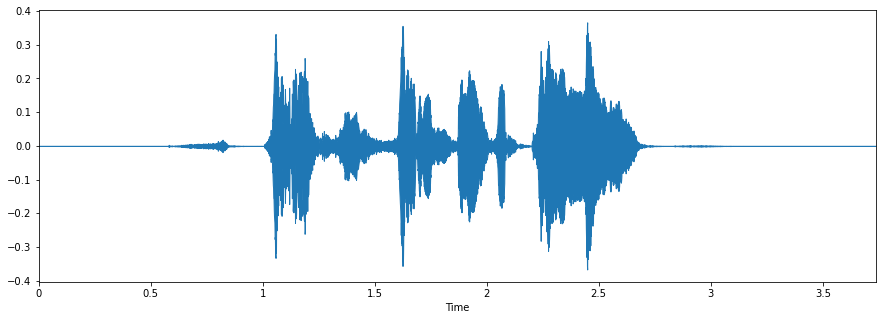

In [18]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [19]:
# Lets play the audio 
ipd.Audio(fname)

In [20]:
# TESS Dataset

In [21]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [22]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

In [23]:
TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_sad         400
female_surprise    400
female_neutral     400
female_angry       400
female_disgust     400
female_fear        400
female_happy       400
Name: labels, dtype: int64

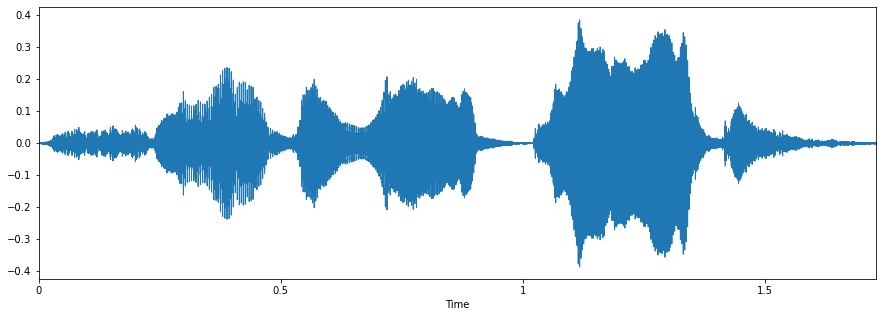

In [24]:
# lets play a fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [25]:
# Lets play the audio 
ipd.Audio(fname)

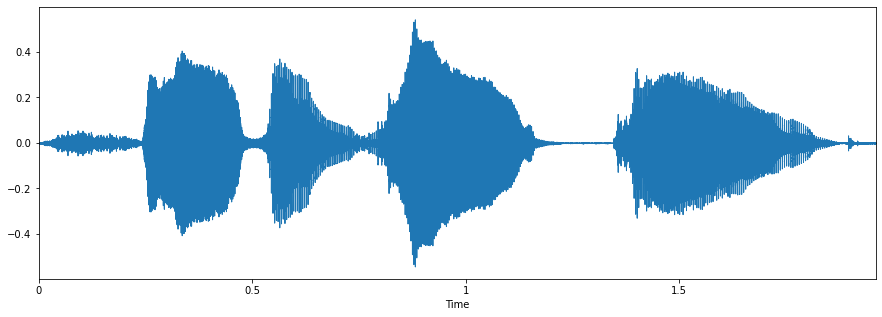

In [26]:
# lets play a happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [27]:
# Lets play the audio 
ipd.Audio(fname)

In [28]:
#CREMA-D

In [29]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [30]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)

In [31]:
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_disgust      671
male_sad          671
male_angry        671
male_fear         671
male_happy        671
female_sad        600
female_angry      600
female_disgust    600
female_happy      600
female_fear       600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

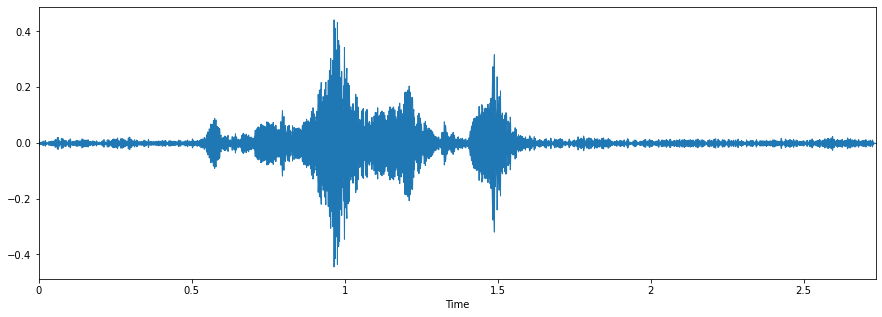

In [32]:
# Explore Happy Track
fname = CREMA + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [33]:
# Lets play the audio 
ipd.Audio(fname)

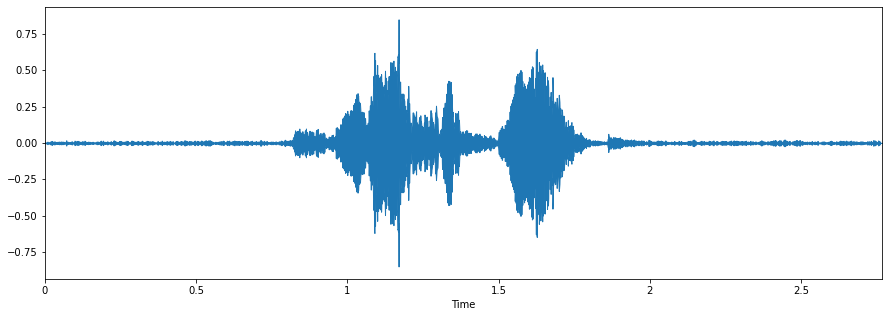

In [34]:
# A fearful track
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [35]:
#Merge all 4 datasets

In [36]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_angry       1096
female_happy       1096
female_fear        1096
female_sad         1096
female_disgust     1096
female_neutral     1056
male_neutral        839
male_disgust        827
male_sad            827
male_angry          827
male_fear           827
male_happy          827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


In [37]:
print(df.labels.value_counts().sum())

12162


In [39]:
path = "C:/Users/Moritz/Desktop/Data/TESS/YAF_fear/YAF_dog_fear.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

Text(0.5, 1.0, 'Audio sampled at 44100 hrz')

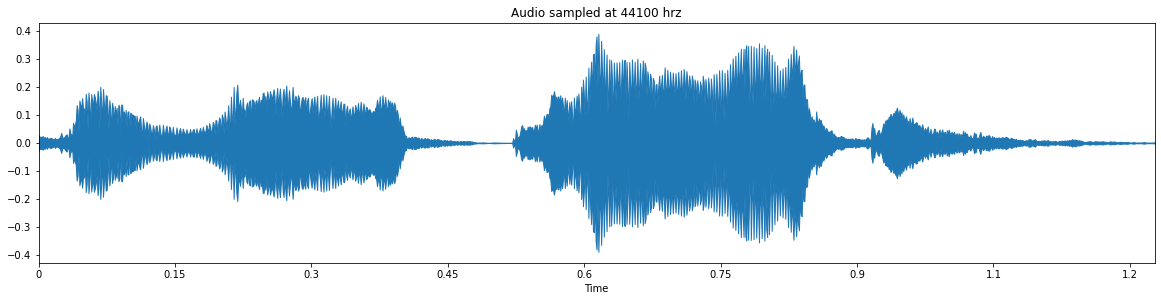

In [41]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

In [43]:
ipd.Audio(path)

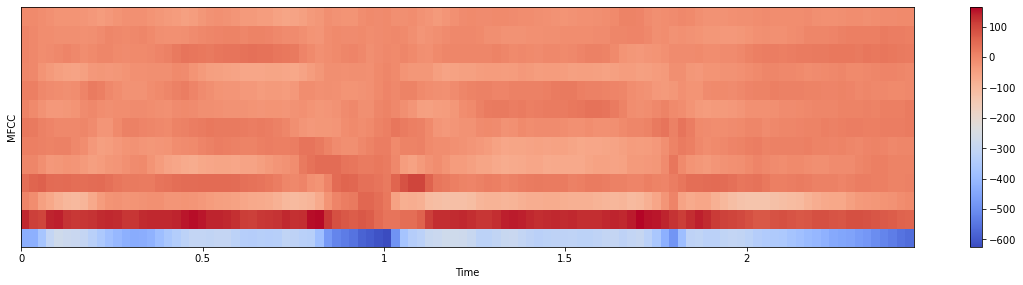

In [44]:
# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [1]:
#Load the dataset that I have saved before

In [4]:
dat = pd.read_csv("C:/Users/Moritz/Desktop/Data/Data_path.csv")
dat.head()
dat.tail()

,labels,source,path
12157,female_disgust,CREMA,C:/Users/Moritz/Desktop/Data/CREMAD/AudioWAV/1...
12158,female_fear,CREMA,C:/Users/Moritz/Desktop/Data/CREMAD/AudioWAV/1...
12159,female_happy,CREMA,C:/Users/Moritz/Desktop/Data/CREMAD/AudioWAV/1...
12160,female_neutral,CREMA,C:/Users/Moritz/Desktop/Data/CREMAD/AudioWAV/1...
12161,female_sad,CREMA,C:/Users/Moritz/Desktop/Data/CREMAD/AudioWAV/1...


In [6]:
# In order to optimise space and memory, I am going to read each audio file, 
# extract its mean across all MFCC bands by time, and just keep the extracted 
# features, dropping the entire audio file data.
# Why the mean? Since the time window is a short one, the changes observed
# overtime do not vary greatly. The key feature is capturing the information 
# contained in the various bands.


df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(dat.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5)
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1  

In [7]:
# Check a few records to make sure its processed successfully
print(len(df))
df.head()

12162


,feature
0,"[-11.113932, -7.215756, -6.21919, -5.9265423, ..."
1,"[-24.44983, -22.465742, -22.928043, -23.243807..."
2,"[-25.000114, -24.520256, -24.178183, -23.84745..."
3,"[-1.5298388, -4.333437, -12.285238, -13.083024..."
4,"[-22.458632, -22.467833, -25.884357, -27.82704..."


In [20]:
# Data Processing

In [21]:
# Now I will munge the data into a workable format and pad out any issues I find.

In [8]:
# Now I extract the mean bands to its own feature columns
df = pd.concat([dat,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_angry,SAVEE,C:/Users/Moritz/Desktop/Data/SAVEE/DC_a01.wav,-11.113932,-7.215756,-6.219190,-5.926542,-5.850419,-4.808960,-2.513003,...,-4.088851,-5.023864,-5.254714,-5.234095,-5.310306,-5.621665,-6.072197,-6.611348,-2.509089,1.964608
1,male_angry,SAVEE,C:/Users/Moritz/Desktop/Data/SAVEE/DC_a02.wav,-24.449829,-22.465742,-22.928043,-23.243807,-22.926605,-23.432243,-14.830002,...,-22.627256,-22.633406,-22.511599,-24.300154,-24.496809,-22.895985,-23.511503,-24.342152,-24.530262,-25.457796
2,male_angry,SAVEE,C:/Users/Moritz/Desktop/Data/SAVEE/DC_a03.wav,-25.000114,-24.520256,-24.178183,-23.847450,-15.182781,-10.732485,-8.681472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male_angry,SAVEE,C:/Users/Moritz/Desktop/Data/SAVEE/DC_a04.wav,-1.529839,-4.333437,-12.285238,-13.083024,-12.041327,-11.819768,-9.414147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,male_angry,SAVEE,C:/Users/Moritz/Desktop/Data/SAVEE/DC_a05.wav,-22.458632,-22.467833,-25.884357,-27.827044,-27.593534,-26.666512,-18.659025,...,-25.291666,-25.854906,-26.821354,-25.436455,-24.179941,-23.281618,-24.167494,-25.228062,-25.902941,-25.589964


In [9]:
# replace NA with 0
df = df.fillna(0)
print(df.shape)
df[:5]

(12162, 219)


,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_angry,SAVEE,C:/Users/Moritz/Desktop/Data/SAVEE/DC_a01.wav,-11.113932,-7.215756,-6.219190,-5.926542,-5.850419,-4.808960,-2.513003,...,-4.088851,-5.023864,-5.254714,-5.234095,-5.310306,-5.621665,-6.072197,-6.611348,-2.509089,1.964608
1,male_angry,SAVEE,C:/Users/Moritz/Desktop/Data/SAVEE/DC_a02.wav,-24.449829,-22.465742,-22.928043,-23.243807,-22.926605,-23.432243,-14.830002,...,-22.627256,-22.633406,-22.511599,-24.300154,-24.496809,-22.895985,-23.511503,-24.342152,-24.530262,-25.457796
2,male_angry,SAVEE,C:/Users/Moritz/Desktop/Data/SAVEE/DC_a03.wav,-25.000114,-24.520256,-24.178183,-23.847450,-15.182781,-10.732485,-8.681472,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male_angry,SAVEE,C:/Users/Moritz/Desktop/Data/SAVEE/DC_a04.wav,-1.529839,-4.333437,-12.285238,-13.083024,-12.041327,-11.819768,-9.414147,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male_angry,SAVEE,C:/Users/Moritz/Desktop/Data/SAVEE/DC_a05.wav,-22.458632,-22.467833,-25.884357,-27.827044,-27.593534,-26.666512,-18.659025,...,-25.291666,-25.854906,-26.821354,-25.436455,-24.179941,-23.281618,-24.167494,-25.228062,-25.902941,-25.589964


In [39]:
# Data Splitting

In [42]:
# Next I will split the data into test and training to assure the accuracy

In [ ]:
# But before that I will install some more libabries

In [3]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [2]:
# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [1]:
# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

In [11]:
# Trainingsdata check 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
4950,-18.611181,-17.616537,-18.411486,-18.987419,-17.404621,-16.747271,-17.733749,-18.055027,-17.931206,-15.913171,...,-22.899401,-21.647814,-19.758650,-18.879402,-19.397379,-20.171659,-22.689243,-24.612816,-24.153774,-22.703133
3860,-10.786571,-14.882178,-23.087040,-22.467028,-20.362326,-19.076141,-19.761509,-13.231027,-11.808992,-16.756002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9761,-1.533946,-4.030604,-9.614024,-12.045173,-9.992991,-11.926252,-14.008467,-13.561554,-14.024567,-15.151947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7620,-4.531078,-3.933794,-4.567833,-5.871509,-5.282473,-6.490460,-8.156467,-9.188803,-8.681726,-8.212409,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11586,-20.621702,-21.587507,-20.563650,-20.703461,-21.205717,-18.608528,-18.446669,-16.211845,-14.257653,-15.160404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7914,-17.514992,-18.551868,-17.043013,-16.977903,-19.369631,-19.562126,-22.008749,-20.178383,-17.989597,-19.336285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9513,-18.740366,-18.824932,-16.149492,-16.963455,-18.229977,-18.183958,-19.274342,-18.395124,-16.951286,-16.672031,...,-17.882132,-19.390713,-17.779474,-19.165974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5835,-19.066851,-18.328384,-17.710285,-18.043194,-18.252481,-18.710627,-16.626352,-17.831005,-18.028345,-17.859108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5389,-20.760592,-20.047142,-18.961346,-19.468687,-19.316292,-18.162565,-18.102333,-19.914131,-20.931385,-19.215496,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11222,-18.252926,-17.727369,-19.222475,-18.469973,-17.572329,-17.850544,-17.932026,-20.588900,-18.612185,-15.990725,...,-18.065437,-18.135092,-19.665306,-20.741903,-20.273033,-18.371033,-15.576725,-17.512487,-17.008549,-18.195284


In [14]:
# Because I have different datasets, I will normalize the data
# Maybe it will improve the accuracy - "exploding gradients"

In [12]:
# Data normalization 
from sklearn.preprocessing import StandardScaler
def fit_X_scaler(X_train):
    """fit StandardScaler，and return StandardScaler object
    """
    sc = StandardScaler()
    for _, clips in enumerate(X_train):
        data_i_truncated = np.squeeze(clips)
        sc.partial_fit(data_i_truncated)
    return sc

def get_X_scaled(X_train, scaler=None):
    """apply normlization
    """
    X_train_new = np.zeros(X_train.shape)
    for indx, clips in enumerate(X_train):
        data_i_truncated = np.squeeze(clips)
        if scaler is not None:  # normlize
            data_i_truncated = scaler.transform(data_i_truncated)
        X_train[indx, :, :, 0] = data_i_truncated
    return X_train

sc = fit_X_scaler(X_train)
X_train = get_X_scaled(X_train, sc)
X_test = get_X_scaled(X_test, sc)

ValueError: Expected 2D array, got scalar array instead:
array=0.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [26]:
# Check the dataset now again
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
9042,0.038304,-0.198296,-0.994553,-0.964496,-0.913438,-0.919224,-1.051298,-0.983604,-0.644213,-0.650192,...,0.353917,0.346107,0.345747,0.346111,0.337395,0.337309,0.337590,0.330411,0.327325,0.324731
10022,-0.113113,-0.240359,-0.236203,-0.251929,-0.324131,-0.293887,-0.259902,-0.266843,-0.343222,-0.293315,...,0.353917,0.346107,0.345747,0.346111,0.337395,0.337309,0.337590,0.330411,0.327325,0.324731
18794,-0.649351,-0.515168,-0.375735,-0.443707,-0.437821,-0.452762,-0.431045,-0.373015,-0.287642,-0.422125,...,0.353917,0.346107,0.345747,0.346111,0.337395,0.337309,0.337590,0.330411,0.327325,0.324731
23485,0.708729,0.746322,0.787294,0.768579,0.724478,0.685402,0.647834,0.732736,0.837403,0.822676,...,0.353917,0.346107,0.345747,0.346111,0.337395,0.337309,0.337590,0.330411,0.327325,0.324731
11917,0.711929,0.745128,0.784410,0.766066,0.729817,0.685934,0.617111,0.610741,0.545840,0.614926,...,0.353917,0.346107,0.345747,0.346111,0.337395,0.337309,0.337590,0.330411,0.327325,0.324731
1023,0.707523,0.740934,0.780883,0.775343,0.751121,0.688638,0.612399,0.609471,0.554967,0.626803,...,0.353917,0.346107,0.345747,0.346111,0.337395,0.337309,0.337590,0.330411,0.327325,0.324731
888,-1.610995,-1.763388,-1.800461,-1.604079,-1.020328,-0.807647,-0.826908,-0.927020,-0.947367,-1.081991,...,-2.921497,-2.860349,-2.857274,-2.862681,-2.939929,-2.927769,-2.792779,-2.852548,-2.938851,-2.783637
19349,0.710451,0.743912,0.785765,0.776706,0.766985,0.704397,0.610227,0.610089,0.567415,0.656482,...,0.353917,0.346107,0.345747,0.346111,0.337395,0.337309,0.337590,0.330411,0.327325,0.324731
9037,0.708158,0.740966,0.780324,0.761051,0.719258,0.690639,0.637856,0.632227,0.560193,0.623397,...,0.353917,0.346107,0.345747,0.346111,0.337395,0.337309,0.337590,0.330411,0.327325,0.324731
20263,0.710716,0.744854,0.787916,0.842325,0.902391,0.705738,0.606125,0.607478,0.568740,0.688439,...,0.353917,0.346107,0.345747,0.346111,0.337395,0.337309,0.337590,0.330411,0.327325,0.324731


In [18]:
# For Keras, I will convert the data format to a numpy array 

In [27]:
# Few preparation steps for the correct Keras 

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [28]:
# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [15]:
# Pickl the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

In [22]:
### Classification


In [23]:
# I want to use a CNN
# For this I need to define a third dimension - which is 1, because of the 1 D CNN


In [16]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9121, 216, 1)

In [25]:
# Classification Model

In [17]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 216, 256)          1024      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 256)           0

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=35, validation_data=(X_test, y_test))

Epoch 1/35
571/571 [==============================] - 47s 83ms/step - loss: 1.3088 - accuracy: 0.5452 - val_loss: 1.6009 - val_accuracy: 0.4564
Epoch 2/35
571/571 [==============================] - 47s 82ms/step - loss: 1.3006 - accuracy: 0.5511 - val_loss: 1.5941 - val_accuracy: 0.4541
Epoch 3/35
571/571 [==============================] - 47s 83ms/step - loss: 1.2981 - accuracy: 0.5528 - val_loss: 1.6062 - val_accuracy: 0.4538
Epoch 4/35
571/571 [==============================] - 47s 83ms/step - loss: 1.2830 - accuracy: 0.5568 - val_loss: 1.6228 - val_accuracy: 0.4331
Epoch 5/35
571/571 [==============================] - 47s 82ms/step - loss: 1.2779 - accuracy: 0.5616 - val_loss: 1.5967 - val_accuracy: 0.4502
Epoch 6/35
571/571 [==============================] - 47s 82ms/step - loss: 1.2670 - accuracy: 0.5645 - val_loss: 1.6046 - val_accuracy: 0.4538
Epoch 7/35
571/571 [==============================] - 47s 82ms/step - loss: 1.2605 - accuracy: 0.5692 - val_loss: 1.6480 - val_accuracy:

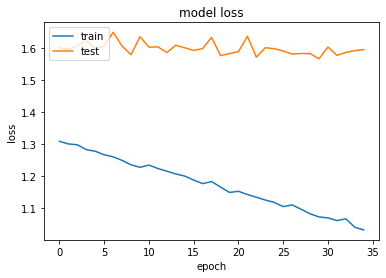

In [21]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()